In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install lightgbm --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.0 MB/s eta 0:00:00


In [3]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.5 MB/s eta 0:00:00


In [4]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.1 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
# from natsort import natsorted
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# import shap
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [6]:
train = pd.read_csv('/content/drive/My Drive/BUN_BO/Data.SHL/Data_using/data_train.csv')
test = pd.read_csv('/content/drive/My Drive/BUN_BO/Data.SHL/Data_using/data_test.csv')
# train = train.drop("action", axis = 1)
# test = test.drop("action", axis = 1)

In [7]:
train.isna().sum()

,0
action,0
atr01/acc_x,0
atr01/acc_y,0
atr01/acc_z,0
atr01/gyro_x,0
...,...
atr03/acc_x_atr03/acc_z_corr,66
atr03/acc_y_atr03/acc_z_corr,66
atr04/acc_x_atr04/acc_y_corr,66
atr04/acc_x_atr04/acc_z_corr,66


In [8]:
test.isna().sum()

,0
action,0
atr01/acc_x,0
atr01/acc_y,0
atr01/acc_z,0
atr01/gyro_x,0
...,...
atr03/acc_x_atr03/acc_z_corr,12
atr03/acc_y_atr03/acc_z_corr,12
atr04/acc_x_atr04/acc_y_corr,12
atr04/acc_x_atr04/acc_z_corr,12


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756499 entries, 0 to 756498
Columns: 302 entries, action to atr04/acc_y_atr04/acc_z_corr
dtypes: float64(300), int64(2)
memory usage: 1.7 GB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155878 entries, 0 to 155877
Columns: 302 entries, action to atr04/acc_y_atr04/acc_z_corr
dtypes: float64(300), int64(2)
memory usage: 359.2 MB


In [11]:
# a()

In [12]:
target = "operation"

print("Kích thước dữ liệu train:", train.shape)
print("Kích thước dữ liệu test:", test.shape)

train[target] = train[target].astype('category')
test[target] = test[target].astype('category')

train.dropna(inplace=True)
test.dropna(inplace=True)

print("Kích thước dữ liệu train:", train.shape)
print("Kích thước dữ liệu test:", test.shape)

Kích thước dữ liệu train: (756499, 302)
Kích thước dữ liệu test: (155878, 302)
Kích thước dữ liệu train: (756433, 302)
Kích thước dữ liệu test: (155866, 302)


In [13]:
X_train = train.drop(target, axis=1)
y_train = train[target]

X_test = test.drop(target, axis=1)
y_test = test[target]

In [14]:
# b()

In [15]:
# Mã hóa nhãn
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Trước SMOTE:", pd.Series(y_train_encoded).value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)
print("Sau SMOTE:", pd.Series(y_train_resampled).value_counts())

print("Nhãn trong y_train_resampled:", np.unique(y_train_resampled))
print("Nhãn trong y_test_encoded:", np.unique(y_test_encoded))



Trước SMOTE: 2     127723
6     101661
1     101647
0      84700
4      80370
3      78331
9      58438
7      55010
5      31131
8      24632
10     12790
Name: count, dtype: int64
Sau SMOTE: 0     127723
1     127723
2     127723
10    127723
3     127723
4     127723
5     127723
6     127723
7     127723
8     127723
9     127723
Name: count, dtype: int64
Nhãn trong y_train_resampled: [ 0  1  2  3  4  5  6  7  8  9 10]
Nhãn trong y_test_encoded: [ 0  1  2  3  4  5  6  7  8  9 10]



🔍 Đang huấn luyện mô hình: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:45:18] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:45:18] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)


AUROC của XGBoost: 0.9948
              precision    recall  f1-score   support

         100       0.65      0.97      0.78     14968
         200       0.99      0.65      0.78     22388
         300       0.92      0.88      0.90     23765
         400       0.80      0.97      0.87     12987
         500       0.91      0.85      0.88     14822
         600       1.00      0.98      0.99      6453
         700       0.89      0.88      0.88     28081
         800       0.96      0.98      0.97     10401
         900       0.93      0.88      0.91      7552
        1000       0.91      0.94      0.92     12004
        8100       0.62      0.54      0.58      2445

    accuracy                           0.87    155866
   macro avg       0.87      0.87      0.86    155866
weighted avg       0.89      0.87      0.87    155866



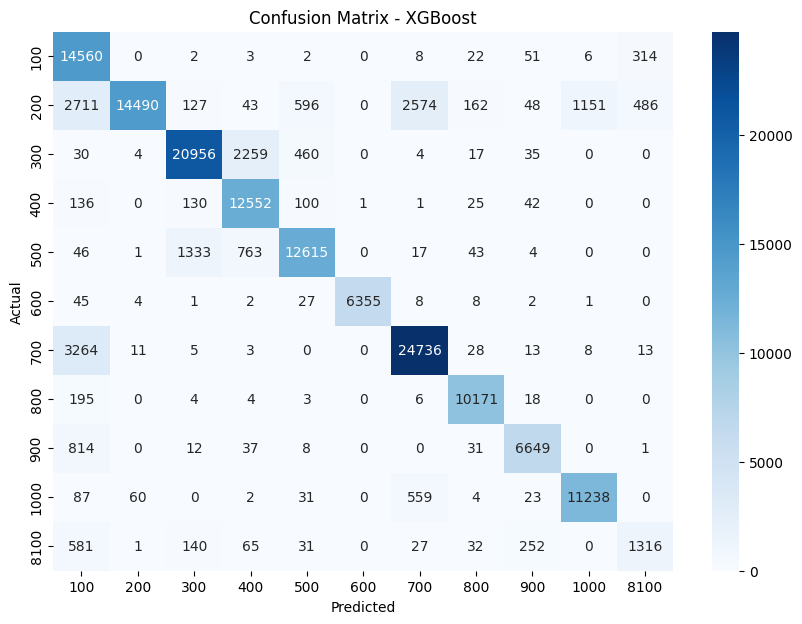


🔍 Đang huấn luyện mô hình: LightGBM
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 76752
[LightGBM] [Info] Number of data points in the train set: 1404953, number of used features: 301


LightGBMError: No OpenCL device found

In [16]:
# Các model sẽ thử nghiệm
models = {
    # "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    # "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    # "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    # "KNN (K-Nearest Neighbors)": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        tree_method='hist',  # Sử dụng phương pháp 'hist' kết hợp với GPU
        device='cuda'        # Chỉ định sử dụng GPU
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=200,
        learning_rate=0.1,
        device='gpu'  # Sử dụng GPU
)
}

# Huấn luyện và đánh giá từng model
for model_name, model in models.items():
    print(f"\n🔍 Đang huấn luyện mô hình: {model_name}")
    model.fit(X_train_resampled, y_train_resampled)

    y_pred_encoded = model.predict(X_test)

    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    y_test_original = label_encoder.inverse_transform(y_test_encoded)

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        if len(np.unique(y_test_encoded)) == 2:
            auc = roc_auc_score(y_test_encoded, y_pred_proba[:, 1], average='macro')
        else:
            auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr')
        print(f"AUROC của {model_name}: {auc:.4f}")
    else:
        print(f"{model_name} không hỗ trợ predict_proba().")

    print(classification_report(y_test_original, y_pred))

    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test_original, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, mixed_precision
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.keras import TqdmCallback

# 1. Cấu hình GPU và mixed precision
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        policy = mixed_precision.Policy('mixed_float16')
        mixed_precision.set_global_policy(policy)
        print(f"Đang sử dụng {len(gpus)} GPU(s)")
    except RuntimeError as e:
        print(e)
else:
    print("Không tìm thấy GPU, sẽ sử dụng CPU")

# 2. Chuẩn bị dữ liệu
# Giả sử đã có:
# - X_train_resampled, y_train_resampled (đã qua SMOTE)
# - X_test, y_test_encoded (gốc, chưa qua xử lý)

# One-hot encode labels
num_classes = 11
y_train_onehot = tf.keras.utils.to_categorical(y_train_resampled, num_classes=num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=num_classes)

# 3. Tạo data pipeline
def create_dataset(X, y, batch_size=512, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(X))
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_dataset = create_dataset(X_train_resampled, y_train_onehot)
test_dataset = create_dataset(X_test, y_test_onehot, shuffle=False)

# 4. Xây dựng model
def build_multi_class_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('swish'),
        layers.Dropout(0.5),

        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation('swish'),
        layers.Dropout(0.4),

        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('swish'),
        layers.Dropout(0.3),

        layers.Dense(num_classes, activation='softmax', dtype=tf.float32)
    ])
    return model

model = build_multi_class_model(X_train_resampled.shape[1:], num_classes)

# 5. Compile model
optimizer = optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc', multi_label=True),
        tf.keras.metrics.Precision(name='precision', average='macro'),
        tf.keras.metrics.Recall(name='recall', average='macro')
    ]
)

# 6. Callbacks
callbacks = [
    callbacks.EarlyStopping(monitor='val_auc', patience=15, mode='max', restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
    callbacks.ModelCheckpoint('best_multi_class_model.h5',
                            save_best_only=True,
                            monitor='val_auc',
                            mode='max'),
    TqdmCallback(verbose=1)
]

# 7. Huấn luyện
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=test_dataset,
    callbacks=callbacks,
    verbose=0
)

# 8. Đánh giá
def evaluate_multiclass():
    # Dự đoán
    y_pred_probs = model.predict(test_dataset)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Tính metrics
    auc = roc_auc_score(y_test_onehot, y_pred_probs, multi_class='ovo')
    print(f"\nAUROC (OvO): {auc:.4f}")

    # Báo cáo phân loại
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(12,10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Vẽ ROC curve cho từng lớp
    plt.figure(figsize=(10,8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_onehot[:, i], y_pred_probs[:, i])
        plt.plot(fpr, tpr, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc_score(y_test_onehot[:, i], y_pred_probs[:, i]):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curves')
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()

evaluate_multiclass()

# 9. Phân tích lỗi
def error_analysis():
    # Lấy các mẫu phân loại sai
    y_test_pred = np.argmax(model.predict(test_dataset), axis=1)
    wrong_indices = np.where(y_test_pred != y_test_encoded)[0]

    # Phân phối lỗi theo lớp
    error_distribution = pd.Series(y_test_encoded[wrong_indices]).value_counts()

    plt.figure(figsize=(10,6))
    sns.barplot(x=error_distribution.index, y=error_distribution.values)
    plt.xticks(ticks=range(num_classes), labels=label_encoder.classes_)
    plt.title('Error Distribution by Class')
    plt.xlabel('Class')
    plt.ylabel('Error Count')
    plt.show()

error_analysis()

Đang sử dụng 1 GPU(s)


NameError: name 'y_train_resampled' is not defined

In [ ]:
b()

In [ ]:
def fill_nan_with_int(data):
  data.replace(0, pd.NA, inplace=True)
  data.fillna(method='ffill', inplace=True)